# Quick Start

This brief tutorial goes through the most minimal code you could write to do an orbit fit with `orbitize!`. It uses an input .csv that was placed on your computer when you installed `orbitize!`. The file lives here:

In [1]:
import orbitize

path_to_file = '{}GJ504.csv'.format(orbitize.DATADIR)

print(path_to_file)

/home/sblunt/Projects/orbitize/orbitize/example_data/GJ504.csv


The input .csv file looks like this:

In [2]:
from orbitize import read_input

read_input.read_file(path_to_file)

epoch,object,quant1,quant1_err,quant2,quant2_err,quant12_corr,quant_type,instrument
float64,int64,float64,float64,float64,float64,float64,bytes5,bytes5
55645.95,1,2479.0,16.0,327.94,0.39,nan,seppa,defsp
55702.89,1,2483.0,8.0,327.45,0.19,nan,seppa,defsp
55785.015,1,2481.0,33.0,326.84,0.94,nan,seppa,defsp
55787.935,1,2448.0,24.0,325.82,0.66,nan,seppa,defsp
55985.19400184,1,2483.0,15.0,326.46,0.36,nan,seppa,defsp
56029.11400323,1,2487.0,8.0,326.54,0.18,nan,seppa,defsp
56072.30200459,1,2499.0,26.0,326.14,0.61,nan,seppa,defsp


<Figure size 1008x432 with 0 Axes>

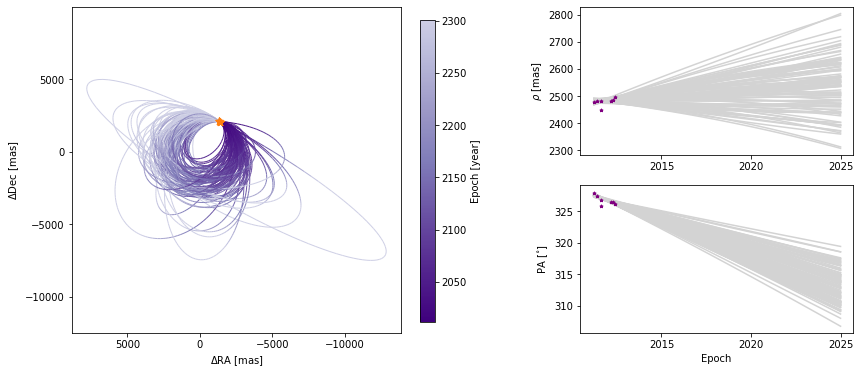

In [3]:
%matplotlib inline

from orbitize import driver

myDriver = driver.Driver(
    '{}/GJ504.csv'.format(orbitize.DATADIR), # data file
    'OFTI',        # choose from: ['OFTI', 'MCMC']
    1,             # number of planets in system
    1.22,          # total mass [M_sun]
    56.95,         # system parallax [mas]
    mass_err=0.08, # mass error [M_sun]
    plx_err=0.26   # parallax error [mas]
)
orbits = myDriver.sampler.run_sampler(10000)

# plot the results
myResults = myDriver.sampler.results
orbit_figure = myResults.plot_orbits(
    start_mjd=myDriver.system.data_table['epoch'][0] # minimum MJD for colorbar (choose first data epoch)
)
